In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [10]:
df=pd.read_csv("custchurn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1209,8268-YDIXR,Male,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,93.15,5253.95,No
4338,9708-HPXWZ,Male,1,No,No,5,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,No,Credit card (automatic),45.40,214.75,No
2611,5976-JCJRH,Male,0,Yes,No,10,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,738.2,Yes
897,0678-RLHVP,Female,0,No,No,53,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Electronic check,105.55,5682.25,No
6598,6169-PGNCD,Female,0,No,No,57,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),74.30,4166.35,No


In [11]:
#remove customerID as it is useless for us here

In [12]:
df.drop('customerID', axis='columns', inplace=True)


In [13]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4100,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.80,1013.2,No
1099,Male,0,Yes,Yes,5,Yes,Yes,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.70,259.4,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
4526,Male,0,No,No,13,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.75,956.65,No
6640,Male,0,Yes,Yes,28,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Mailed check,50.80,1386.8,No


In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
#convert TotalCharges to numeric, coerce will put na where it cannot convert, example where there is no value or space
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df.iloc[488] #intergerLocation

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [18]:
df.iloc[3].TotalCharges

'1840.75'

In [19]:
df1=df[df.TotalCharges!=' ']

In [20]:
df1.shape

(7032, 20)

In [21]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-21-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
tenure_no=df1[df1.Churn=='No'].tenure #not leaving
tenure_yes=df1[df1.Churn=='Yes'].tenure #leaving

Text(0.5, 1.0, 'customer churn prediction visualization')

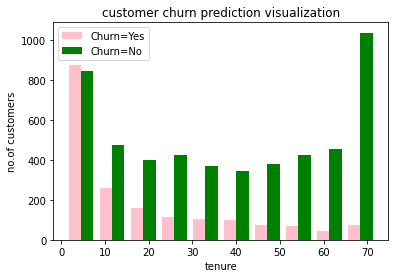

In [24]:
plt.hist([tenure_yes, tenure_no], color=['pink', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('no.of customers')
plt.title('customer churn prediction visualization')

In [25]:
month_no=df1[df1.Churn=='No'].MonthlyCharges #not leaving
month_yes=df1[df1.Churn=='Yes'].MonthlyCharges #leaving

Text(0.5, 1.0, 'customer churn prediction visualization')

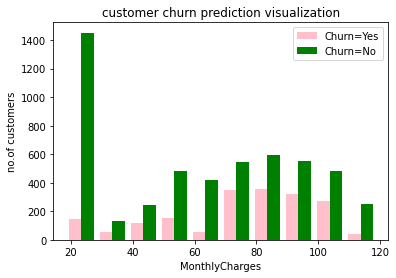

In [26]:
plt.hist([month_yes, month_no], color=['pink', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('no.of customers')
plt.title('customer churn prediction visualization')

In [27]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [28]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [29]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1585,Male,0,Yes,No,42,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Credit card (automatic),80.45,3375.90,No
23,Female,0,Yes,No,58,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No
1055,Female,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.55,620.75,No
4918,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,1086.75,No
164,Female,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No


In [30]:
df1.replace('No phone service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

<ipython-input-30-87a5fd6a8a8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)
<ipython-input-30-87a5fd6a8a8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [31]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [32]:
yes_no_col=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

<ipython-input-32-4ec380e3d41f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [33]:
for column in df1:
        print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

<ipython-input-34-42199c906633>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [35]:
for column in df1:
        print(f'{column}: {df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [36]:
pd.get_dummies(df1.InternetService)

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [37]:
df2=pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [38]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [41]:
df2[to_scale]=scaler.fit_transform(df2[to_scale])

In [42]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [43]:
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [45]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,0,1,1,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1730,0,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4086,1,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
2259,1,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [46]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15,  activation='relu'),
    keras.layers.Dense(1,  activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7481
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8021
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8009
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8052
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accura

In [50]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 7ms/step - loss: 0.4748 - accuracy: 0.7740


[0.4748241901397705, 0.7739872336387634]

In [51]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.12743883],
       [0.55667704],
       [0.00988842],
       [0.8461327 ],
       [0.47673136]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [57]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

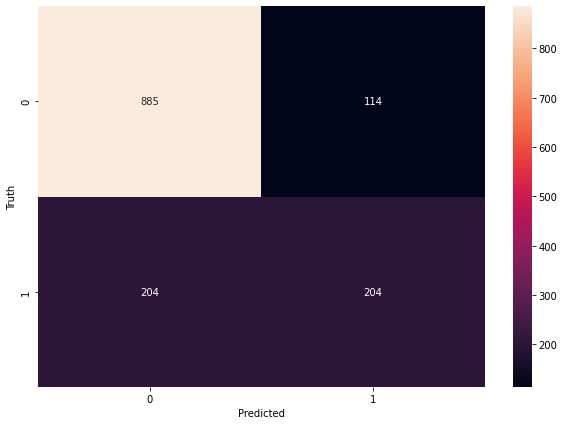

In [60]:
import seaborn as sn
conf_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')